In [22]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 36s 0us/step


In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

array([9], dtype=uint8)

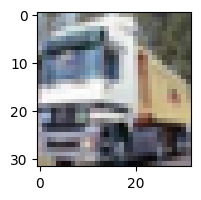

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
y_train[1]

In [42]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [36]:
input_shape = (32, 32, 3)

x_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
x_train=x_train / 255.0
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
x_test=x_test / 255.0

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
            loss='categorical_crossentropy', metrics=['acc'])


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [47]:
history = model.fit(x_train, y_train, batch_size=32,
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3027 - acc: 0.1001
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3027 - acc: 0.0979
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3027 - acc: 0.0964
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3027 - acc: 0.0962
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3026 - acc: 0.0994
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3027 - acc: 0.1001
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3027 - acc: 0.0988
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3027 - acc: 0.0991
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3026 - acc: 0.0974
Epoch 10/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3027 - acc: 0.0987
